In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
read=pd.read_csv(r"titanic/train.csv")

In [4]:
test=pd.read_csv(r"titanic/test.csv")
result=pd.read_csv(r"titanic/gender_submission.csv")
print(test.shape)

(418, 11)


In [5]:
read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 需要对数据有一个比较概括性的认识，包括维度，每一维度的数据特征，空值。检查样本是否重复

In [6]:
#首先检查数据的维度
print('the sample amount is',len(read))
print('the feature + result dimension is',len(read.columns.values))
print('features are:',read.columns.values)

the sample amount is 891
the feature + result dimension is 12
features are: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
#检查是否有重复样本
if read.duplicated().sum()==0:
    print('there is no duplicated')
else:
    print(read.duplicated().sum())

there is no duplicated


In [8]:
#overview
read.info()
#发现有某些数据有很多null，其他的一些没有

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
digital=read.describe().columns.values.tolist()
digital

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
read.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 简单得出一些结论
* Age(many),Cabin(few),embarked(little)有空值
* Survived比例：0.38
* 这艘船，大多是低class的j人；1class的人，不到百分之25
* 船上18-30的人居多
* 船上带有兄弟姐妹的人是少数，并且少有人带2个及以上的兄弟姐妹。分布差距大
* 船上父母孩子一起比例也比较少。分布差距大
* 票价有比较大的差异，但是大多集中在低价位

？：有没有必要找出错误数据？？
我认为，第一次做先没有必要找出错误数据，wrangle可以放在feature engineering部分

## numerical and categorical features division
划分标准有很多
1. 数据类型
2. 数据unique().sum()+threshold
3. 手工分类

In [11]:
#首先用threshold筛选出categorical
initial_features=[i for i in read.columns.values if i !='Survived'] #去除结果列
features_thresh=15
categorical=[]
for i in read.columns.values: 
    unqiues=len(read[i].unique())
    if unqiues<=features_thresh:
        categorical.append(i)
categorical=[i for i in categorical if i!='Survived']
numerical=[i for i in initial_features if i not in categorical]
print('categorical features initially:',categorical)
print('numerical features initially:',numerical)

categorical features initially: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical features initially: ['PassengerId', 'Name', 'Age', 'Ticket', 'Fare', 'Cabin']


In [12]:
#人工调整一下
#实际上，parch这些必为整数的可以作为分类列
for i in numerical:
    if read[i].dtype == 'object':
        print('object',i)
        numerical.remove(i)
numerical.remove('PassengerId')
extra_feature=[i for i in initial_features if i not in categorical+numerical]
print('extra_feature:',extra_feature)
print('categorical features :',categorical)
print('numerical features :',numerical)

object Name
object Ticket
object Cabin
extra_feature: ['PassengerId', 'Name', 'Ticket', 'Cabin']
categorical features : ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical features : ['Age', 'Fare']


## null处理

In [13]:
#对numerical进行nan值检测代替
read.isnull().sum()/len(read)
#去除太多空值的东西

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [14]:
extra_feature.remove('Cabin')

In [15]:
read['Age']=read['Age'].fillna(read['Age'].mean()) #注意这里没有replace就代替一下指针

In [16]:
read.isnull().sum()/len(read)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

## 进行进一步的数据分析
### 关联性

In [17]:
#预处理：sex->boolean

In [18]:
print(read['Sex'].unique())
print(read['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [19]:
read['Sex']=read['Sex'].replace(['female','male'],[0,1])
# read['Embarked']=read['Embarked'].replace(['S','C','Q',np.nan],[0,1,2,3])
#这么是不合理的，categorical计算相关系数，会被超参数定义的数字影响,可以使用分箱
read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

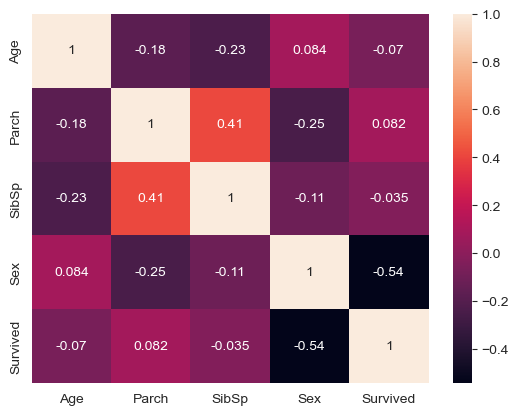

In [20]:
corr=read[['Age','Parch','SibSp','Sex','Survived']].corr()
sns.heatmap(corr,annot=True)

可以得到结论，survival受到pclass,sex,的影响很大

In [21]:
#使用分箱对n类的categorical数据进行关联性分析
read[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [22]:
for i in categorical:
    print(i)
    print(read[[i,'Survived']].groupby([i],as_index=False).mean().sort_values(by='Survived',ascending=False))

Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Sex
   Sex  Survived
0    0  0.742038
1    1  0.188908
SibSp
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Parch
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000
Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


## 初步进行建模
* 贝叶斯分类器
* XGB
* 决策树/决策森林
* 全连接网络

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [24]:
test['Sex']=test['Sex'].replace(['female','male'],[0,1])
test['Age']=test['Age'].fillna(test['Age'].mean())
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [25]:
 Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [26]:
train=read.drop(columns=['PassengerId','Cabin','Embarked','Survived']+extra_feature)


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

* 准备数据
* 准备模型
* 准备score函数

In [28]:
gnb=GaussianNB()
gnb.fit(train,read['Survived'])

GaussianNB()

In [29]:
test_data=test.drop(columns=['PassengerId','Cabin','Embarked']+extra_feature)
# test_data.info()

In [30]:
pred=gnb.predict(test_data)
type(pred),type(result)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [31]:
combined=pd.DataFrame({ 'true':result['Survived'],
                        'pred':pred})

In [32]:
confusion_matrix(combined['true'],combined['pred'])

array([[243,  23],
       [  6, 146]], dtype=int64)

In [33]:
accuracy_score(combined['true'],combined['pred'])

0.930622009569378

In [34]:
roc_auc_score(combined['true'],combined['pred'])

0.93703007518797

In [35]:
tree=DecisionTreeClassifier()
tree.fit(train,read['Survived'])
combined['pred']=tree.predict(test_data)
confusion_matrix(combined['true'],combined['pred'])


array([[228,  38],
       [ 46, 106]], dtype=int64)

In [36]:
accuracy_score(combined['true'],combined['pred'])

0.7990430622009569

In [37]:
roc_auc_score(combined['true'],combined['true'])

1.0

In [38]:
xgb=XGBClassifier()
xgb.fit(train,read['Survived'])
combined['pred']=xgb.predict(test_data)
confusion_matrix(combined['true'],combined['pred'])

array([[232,  34],
       [ 43, 109]], dtype=int64)

In [39]:
accuracy_score(combined['true'],combined['pred'])

0.8157894736842105

In [40]:
roc_auc_score(combined['true'],combined['pred'])

0.7946428571428571

## 回去再分析数据

In [41]:
read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### 进行分箱处理

In [42]:
read['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [123]:
read['Age_band']=pd.cut(read['Age'],bins=[0,12,24,36,48,60,72,84],labels=[0,1,2,3,4,5,6],right=False)

In [124]:
read['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [125]:
read['Fare'].value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

In [126]:
read['Fare_band']=pd.cut(read['Fare'],bins=[0,10,20,30,50,520],labels=[0,1,2,3,4],right=False)
read['Fare_band'].unique()

[0, 4, 2, 1, 3]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [130]:
read['Parch'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Parch
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [131]:
read['SibSp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: SibSp
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [132]:
read['Family']=read['Parch']+read['SibSp']

In [133]:
read['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [134]:
read.Name.str.extract(' ([A-Za-z]+)\.', expand=False).head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Name, dtype: object

这个正则表达式 `([A-Za-z]+)\.` 用来匹配一个或多个连续的英文字母后面跟着一个点号 `.` 的字符串。具体解析如下：

- `([A-Za-z]+)`：这是一个捕获组，用来匹配至少一个由大写字母（`A-Z`）或小写字母（`a-z`）组成的字符串。`+` 表示匹配前面的字符集一次或多次。
- `\.`：匹配一个点号。因为点号在正则表达式中是一个特殊字符，所以需要用反斜杠 `\` 进行转义，表示匹配一个普通的点号字符。

例如：
- `Hello.` 会匹配。
- `A.` 也会匹配。
- `123.` 不会匹配，因为 `123` 不包含字母。
- `HelloWorld.` 也会匹配，因为它由字母组成，并且后面有一个点号。

In [135]:
read['Title']=read['Name'].str.extract('([A-Za-z]+)\.',expand=False)
read['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [136]:
titles=read.Title.value_counts().index.tolist()

In [137]:
read.Title=read.Title.replace(titles[5:],'Rare')

In [138]:
titles[:5]+['Rare']

['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rare']

In [139]:
read.Title=read.Title.replace(titles[:5]+['Rare'],np.linspace(int(0),int(5),6))

In [140]:
read.Title.unique()

array([0., 2., 1., 3., 5., 4.])

In [141]:
read.Title=read.Title.astype(int)

In [142]:
read.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_band,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,4,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,4,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,0,0,0


In [143]:
extra_feature

['PassengerId', 'Name', 'Ticket']

In [144]:
train = read.drop(columns=['PassengerId', 'Cabin', 'Embarked', 'Survived'] + extra_feature)

In [177]:
train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_band',
       'Fare_band', 'Family', 'Title'],
      dtype='object')

In [178]:
train=train.drop(columns=['Age', 'SibSp', 'Parch', 'Fare'])#删除高相关性的列

In [179]:
# test_data = test.drop(columns=['PassengerId', 'Cabin', 'Embarked'] + extra_feature)
# # test_data.info()

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Pclass     891 non-null    int64   
 1   Sex        891 non-null    int64   
 2   Age_band   891 non-null    category
 3   Fare_band  891 non-null    category
 4   Family     891 non-null    int64   
 5   Title      891 non-null    int32   
dtypes: category(2), int32(1), int64(3)
memory usage: 26.8 KB


In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    int64   
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  Family       418 non-null    int64   
 12  Fare_band    418 non-null    category
 13  Age_band     418 non-null    category
 14  Title        418 non-null    float64 
dtypes: category(2), float64(3), int64(6), object(4)
memory usage: 44.0+ KB


In [182]:
test['Family']=test['Parch']+test['SibSp']

In [183]:
test['Fare'].describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [184]:
test['Fare_band']=pd.cut(test['Fare'],bins=[0,10,20,30,50,520],labels=[0,1,2,3,4],right=False)
test['Fare_band'].unique()

[0, 1, 2, 4, 3]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [185]:
test['Age'].describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [186]:
test['Age_band']=pd.cut(test['Age'],bins=[0,12,24,36,48,60,72,84],labels=[0,1,2,3,4,5,6],right=False)

In [187]:
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [188]:

test.Title = test.Title.replace(titles[5:]+['Dona'], 'Rare')

In [189]:

test.Title = test.Title.replace(titles[:5] + ['Rare'], np.linspace(int(0), int(5), 6))

In [190]:
test.Title.unique()

array([0., 2., 1., 3., 5., 4.])

In [191]:
read.Title = read.Title.astype(int)

In [192]:
gnb = GaussianNB()
gnb.fit(train, read['Survived'])

GaussianNB()

In [193]:
train.columns.values

array(['Pclass', 'Sex', 'Age_band', 'Fare_band', 'Family', 'Title'],
      dtype=object)

In [194]:
train.columns

Index(['Pclass', 'Sex', 'Age_band', 'Fare_band', 'Family', 'Title'], dtype='object')

In [195]:
test_data=test[train.columns.values]

In [196]:
pred = gnb.predict(test_data)

In [197]:
type(pred), type(result)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [198]:
combined = pd.DataFrame({'true': result['Survived'],
                         'pred': pred})

In [199]:
confusion_matrix(combined['true'], combined['pred'])

array([[232,  34],
       [  4, 148]], dtype=int64)

In [200]:
accuracy_score(combined['true'], combined['pred'])

0.9090909090909091

In [201]:
roc_auc_score(combined['true'], combined['pred'])

0.9229323308270677

In [202]:
tree = DecisionTreeClassifier()
tree.fit(train, read['Survived'])
combined['pred'] = tree.predict(test_data)

In [203]:
confusion_matrix(combined['true'], combined['pred'])

array([[241,  25],
       [ 25, 127]], dtype=int64)

In [204]:

accuracy_score(combined['true'], combined['pred'])

0.8803827751196173

In [205]:
roc_auc_score(combined['true'], combined['true'])

1.0